In [ ]:
## Steam Games data : "steam_data.csv"
## https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset
## Verify/install libraries: pandas, matplotlib...

In [3]:
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [ ]:
## import libraries as pd and plt (to read and visualize our data)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [5]:
stmdata = pd.read_csv("steam_data.csv")
stmdata.head(2)

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...


In [6]:
stmdata.tail(2)

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
71698,Call of Duty®: Modern Warfare® III,$69.99,$69.99,Coming soon,https://store.steampowered.com/app/2519060/Cal...,In the direct sequel to the record-breaking Ca...,NaN,NaN,NaN,NaN,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['Action', 'FPS', 'Shooter', 'First-Person', '...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
71699,Pixel Gun 3D: PC Edition,Free,Free,To be announced,https://store.steampowered.com/app/2524890/Pix...,Pixel Gun 3D is a near complete PC port of a l...,NaN,NaN,NaN,NaN,Cubic Games Studio,Cubic Games Studio,"['English', 'French', 'German', 'Japanese', 'K...","['Action', 'Shooter', 'Pixel Graphics', 'Battl...","['Single-player', 'Online PvP', 'Cross-Platfor...",OS: | Windows 10 (x64) - Windows 11 (x64) | P...


In [385]:
## Drop unrelated columns
## We are looking for games in Steam, we can try to determine if a game's price is related to good/bad reviews
## (Original Price, Discounted Price, Recent Reviews Summary, All Reviews Summary) columns are relevant
## We can keep (Title, Game description, Developer, Publisher) columns for clarity

In [7]:
stmdata = stmdata.drop(["Release Date", "Link", "Recent Reviews Number", "All Reviews Number", "Supported Languages", "Popular Tags", "Game Features", "Minimum Requirements"], axis=1)
stmdata

,Title,Original Price,Discounted Price,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher
0,Baldur's Gate 3,$29.99,$29.99,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,Larian Studios,Larian Studios
1,Counter-Strike: Global Offensive,$14.99,$14.99,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"Valve, Hidden Path Entertainment",Valve
2,Apex Legends™,Free,Free,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,Respawn Entertainment,Electronic Arts
3,Forza Horizon 5,$34.78,$17.39,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,Playground Games,Xbox Game Studios
4,Call of Duty®,Free,Free,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision
...,...,...,...,...,...,...,...,...
71695,The Front,Free,Free,The Front is a survival-open-world-crafting (S...,NaN,NaN,Samar Studio,Samar Studio
71696,The Bornless,Free,Free,"Welcome to The Bornless, an action horror FPS....",NaN,NaN,Cathedral Studios,Cathedral Studios
71697,Winter Memories,Free,Free,After the unforgettable summer memories you’ve...,NaN,NaN,Dojin Otome,Kagura Games
71698,Call of Duty®: Modern Warfare® III,$69.99,$69.99,In the direct sequel to the record-breaking Ca...,NaN,NaN,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision


In [387]:
## View missing values

In [8]:
missval = stmdata.isnull().sum()
print(missval)

Title                         1
Original Price                0
Discounted Price              0
Game Description            211
Recent Reviews Summary    15220
All Reviews Summary       66329
Developer                   221
Publisher                   517
dtype: int64


In [395]:
## Handle missing values (reviews are non-numerical values)
## In this context, for missing reviews, we can consider them 'mixed' (neither positive nor negative)
## for missing (Game Description, Developer, Publisher) blanks mean 'no information'

In [9]:
stmdata["Recent Reviews Summary"] = stmdata["Recent Reviews Summary"].fillna('Mixed')
stmdata["All Reviews Summary"] = stmdata["All Reviews Summary"].fillna('Mixed')

In [10]:
new_missval = stmdata.isnull().sum()
print(new_missval)

Title                       1
Original Price              0
Discounted Price            0
Game Description          211
Recent Reviews Summary      0
All Reviews Summary         0
Developer                 221
Publisher                 517
dtype: int64


In [ ]:
## View duplicated values

In [24]:
dupval = stmdata.duplicated().sum()
print(dupval)

0


In [12]:
## View non numerical values

In [13]:
stmdata["Recent Reviews Summary"].unique()

array(['Overwhelmingly Positive', 'Very Positive', 'Mixed',
       'Mostly Positive', 'Mostly Negative', 'Overwhelmingly Negative',
       'Positive', 'Very Negative', '9 user reviews', '3 user reviews',
       '1 user reviews', '5 user reviews', '2 user reviews',
       '6 user reviews', '4 user reviews', '8 user reviews',
       '7 user reviews', 'Negative'], dtype=object)

In [14]:
stmdata["All Reviews Summary"].unique()

array(['Very Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Mostly Negative', 'Positive',
       'Overwhelmingly Negative'], dtype=object)

In [15]:
stmdata["Original Price"].unique()

array(['$29.99', '$14.99', 'Free', '$34.78', '$34.99', '$19.99', '$33.98',
       '$10.99', '$12.59', '$10.49', '$92.62', '$12.99', '$59.99',
       '$7.99', '$69.99', '$26.99', '$14.49', '$18.49', '$46.99',
       '$51.88', '$6.99', '$27.99', '$21.90', '$39.99', '$24.99',
       '$42.99', '$9.99', '$18.99', '$15.00', '$31.99', '$16.49',
       '$12.49', '$49.99', '$3.49', '$44.99', '$6.29', '$8.49', '$8.00',
       '$43.99', '$79.99', '$32.99', '$22.99', '$4.99', '$15.99',
       '$13.99', '$21.99', '$4.69', '$13.49', '$11.99', '$23.99', '$8.25',
       '$11.50', '$7.87', '$17.00', '$64.36', '$33.49', '$10.00',
       '$24.49', '$99.99', '$35.99', '$69.98', '$3.29', '$2.99', '$4.00',
       '$25.99', '$37.99', '$8.99', '$17.99', '$36.99', '$9.49', '$44.42',
       '$18.70', '$27.49', '$2.69', '$20.99', '$14.68', '$28.98', '$5.99',
       '$145.14', '$22.49', '$22.00', '$9.89', '$20.49', '$16.99',
       '$6.69', '$3.99', '$9.21', '$64.96', '$15.17', '$24.98', '$5.49',
       '$13.59',

In [16]:
stmdata["Discounted Price"].unique()

array(['$29.99', '$14.99', 'Free', '$17.39', '$34.99', '$19.99', '$25.48',
       '$10.99', '$12.59', '$10.49', '$41.68', '$12.99', '$59.99',
       '$7.99', '$17.49', '$26.99', '$14.49', '$16.64', '$46.99',
       '$36.32', '$0.69', '$9.23', '$21.90', '$15.99', '$24.99', '$42.99',
       '$39.99', '$22.39', '$9.99', '$18.99', '$18.49', '$3.00', '$31.99',
       '$16.49', '$69.99', '$6.99', '$12.49', '$7.49', '$49.99', '$2.61',
       '$7.34', '$17.99', '$44.99', '$2.09', '$6.29', '$8.39', '$8.49',
       '$8.00', '$43.99', '$33.59', '$11.24', '$6.59', '$22.99', '$4.99',
       '$13.99', '$21.99', '$4.69', '$8.76', '$11.99', '$23.99', '$12.31',
       '$22.49', '$27.99', '$3.89', '$32.99', '$8.25', '$9.20', '$7.87',
       '$17.00', '$32.18', '$33.49', '$10.00', '$3.12', '$2.49', '$24.49',
       '$7.24', '$54.99', '$35.99', '$48.99', '$3.29', '$2.99', '$4.00',
       '$25.99', '$37.99', '$9.89', '$7.86', '$2.69', '$8.91', '$2.51',
       '$10.86', '$36.99', '$6.24', '$8.54', '$44.42',

In [415]:
## Convert reviews in numerical values (for insufficient reviews, same as missing reviews, we can consider them 'mixed')

In [17]:
stmdata["Recent Reviews Summary"] = stmdata["Recent Reviews Summary"].map({
    'Overwhelmingly Positive':9, 
    'Very Positive':8, 
    'Mostly Positive':7,  
    'Positive':6,
    'Mixed':5,
    'Negative':4,
    'Mostly Negative':3,
    'Very Negative':2,
    'Overwhelmingly Negative':1,
    '9 user reviews':5, 
    '3 user reviews':5,
    '1 user reviews':5, 
    '5 user reviews':5, 
    '2 user reviews':5,
    '6 user reviews':5, 
    '4 user reviews':5, 
    '8 user reviews':5,
    '7 user reviews':5
})

In [18]:
stmdata["All Reviews Summary"] = stmdata["All Reviews Summary"].map({
    'Overwhelmingly Positive':9,
    'Very Positive':8,
    'Mostly Positive':7,
    'Positive':6,
    'Mixed':5,
    'Mostly Negative':3,
    'Overwhelmingly Negative':1
})

In [315]:
## We can convert all prices into floats, we need to convert 'Free' into '0.00'

In [19]:
stmdata['Original Price'] = stmdata['Original Price'].astype(str).str.strip()
stmdata['Original Price'] = stmdata['Original Price'].str.replace('Free', '0.00', regex=True)
stmdata['Original Price'] = (
    stmdata['Original Price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)
stmdata['Original Price'] = pd.to_numeric(stmdata['Original Price'])

In [20]:
stmdata['Discounted Price'] = stmdata['Discounted Price'].astype(str).str.strip()
stmdata['Discounted Price'] = stmdata['Discounted Price'].str.replace('Free', '0.00', regex=True)
stmdata['Discounted Price'] = (
    stmdata['Discounted Price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)
stmdata['Discounted Price'] = pd.to_numeric(stmdata['Discounted Price'])

In [21]:
stmdata

,Title,Original Price,Discounted Price,Game Description,Recent Reviews Summary,All Reviews Summary,Developer,Publisher
0,Baldur's Gate 3,29.99,29.99,"Baldur’s Gate 3 is a story-rich, party-based R...",9,8,Larian Studios,Larian Studios
1,Counter-Strike: Global Offensive,14.99,14.99,Counter-Strike: Global Offensive (CS: GO) expa...,8,8,"Valve, Hidden Path Entertainment",Valve
2,Apex Legends™,0.00,0.00,"Apex Legends is the award-winning, free-to-pla...",5,8,Respawn Entertainment,Electronic Arts
3,Forza Horizon 5,34.78,17.39,Your Ultimate Horizon Adventure awaits! Explor...,8,8,Playground Games,Xbox Game Studios
4,Call of Duty®,0.00,0.00,"Welcome to Call of Duty® HQ, the home of Call ...",5,5,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision
...,...,...,...,...,...,...,...,...
71695,The Front,0.00,0.00,The Front is a survival-open-world-crafting (S...,5,5,Samar Studio,Samar Studio
71696,The Bornless,0.00,0.00,"Welcome to The Bornless, an action horror FPS....",5,5,Cathedral Studios,Cathedral Studios
71697,Winter Memories,0.00,0.00,After the unforgettable summer memories you’ve...,5,5,Dojin Otome,Kagura Games
71698,Call of Duty®: Modern Warfare® III,69.99,69.99,In the direct sequel to the record-breaking Ca...,5,5,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision


In [ ]:
## Steam Data is cleaned

## VISUALIZATION

Text(0.5, 1.0, 'Correlation Heatmap')

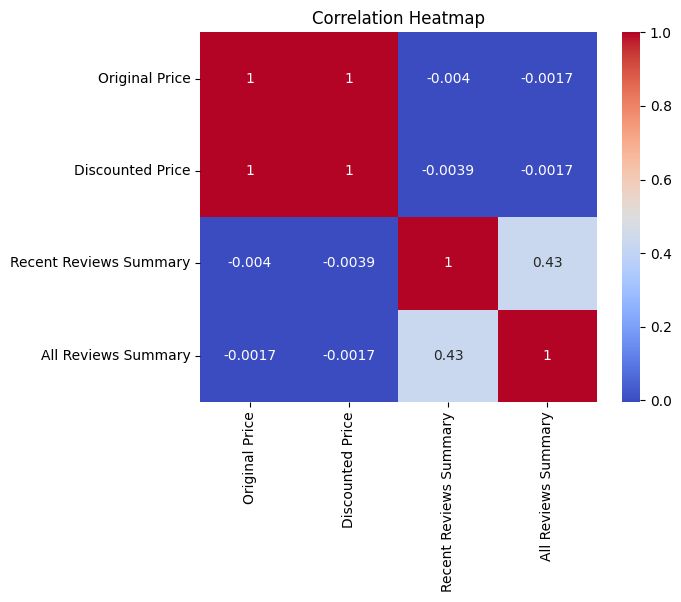

In [27]:
sns.heatmap(stmdata[['Original Price','Discounted Price','Recent Reviews Summary','All Reviews Summary']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [40]:
stmdata["Original Price"].describe()
stmdata["Original Price"].sort_values(ascending=False).head(10)
stmdata["Original Price"].sort_values(ascending=False).head(20)
stmdata = stmdata[stmdata["Original Price"] < 500]



In [ ]:
## We saw that there was extreme result that's why Outliers Detection is needed

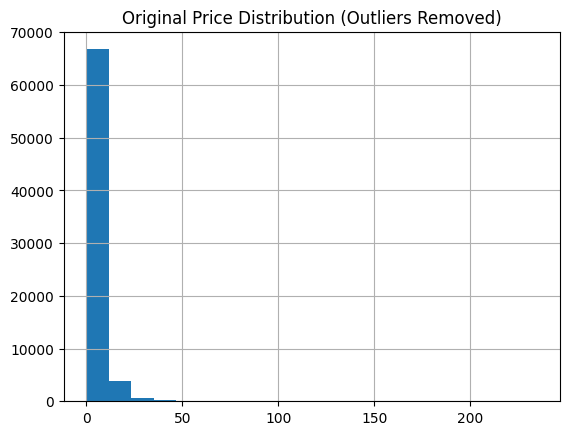

In [46]:
filtered = stmdata[stmdata["Original Price"] < 250]

filtered["Original Price"].hist(bins=20)
plt.title("Original Price Distribution (Outliers Removed)")
plt.show()


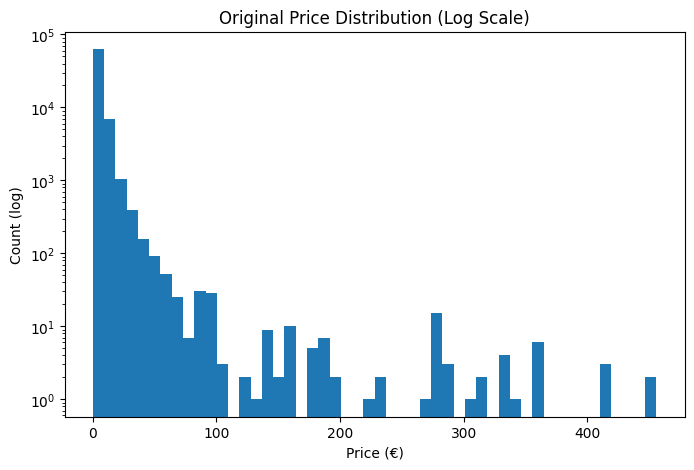

In [47]:
plt.figure(figsize=(8,5))
plt.hist(stmdata["Original Price"], bins=50)
plt.yscale('log')
plt.title("Original Price Distribution (Log Scale)")
plt.xlabel("Price (€)")
plt.ylabel("Count (log)")
plt.show()


In [ ]:
## Correlation between 2 columns

Text(0.5, 1.0, 'Price vs Reviews')

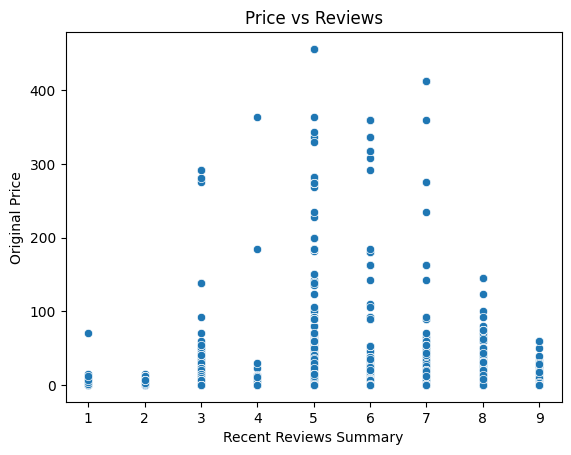

In [48]:
sns.scatterplot(x="Recent Reviews Summary",y="Original Price",data = stmdata)
plt.title("Price vs Reviews")